# QBN - Practical 2


*(a) What do each of the above mentioned routines do? Which one would you use to plot the extracellular potential and which one for the J- and E-field?*

- meshgrid: makes a matrix out of two arrays

- contourf: plots filled with contour lines

- plot_surface: plots the 3D structure, where h(x,y) is evaluated for x and y and plotted

- quiver: plots arrows which represents the vector field

For all of the plots we use meshgrid to set up the matrix of locations at which we can evaluate the functions. The potential should have a finer grained meshgrid since we want to have nice and smooth gradients, whereas the field should have a coarser meshgrid to not have too many arrows.

For the potential we would prefer to use contourf(/imshow) since its a scalar and there is no directionality, whereas for the fields we would prefer quiver since we can capture the directionality of the fields. Another, possibly better option, for the fields is *streamplot*, which seems to be perfect for the occassion of fields. Using streamplot, the contour lines of the field are shown, including arrows of directionality.


*(b) Plot the equipotential curves and E field for a point current I=1 nA at the origin. Make sure that your coordinate grid is spaced finely enough for the plot to look somewhat smooth.*

The potential and E-field for a point current are "point" current I are given by:

$$
V(\overrightarrow{r}) = \frac{I}{4\pi\sigma|\overrightarrow{r}|}
$$

$$
\overrightarrow{E}(\overrightarrow{r}) = \frac{I\overrightarrow{r}}{4\pi\sigma r^3}
$$


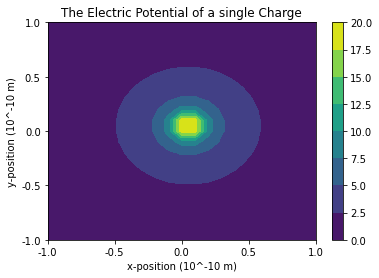

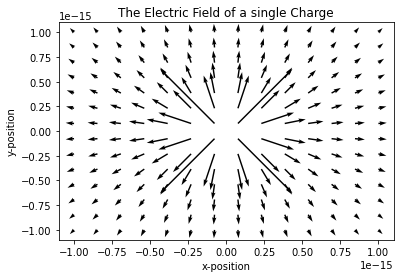

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

sigma = 0.3
I = 10**-9

def E_potential(x,y):
  return I/(4*np.pi*sigma*np.abs(np.sqrt(x**2+y**2)))

x_pots,y_pots = np.meshgrid(np.linspace(-I,I,102),np.linspace(-I,I,102))
pots = E_potential(x_pots,y_pots)

plt.contourf(pots)
plt.xlim([40,60])
plt.ylim([40,60])

scale = (2 * I / 102) * 20 # follows from the values used in meshgrid
set_ticks = np.linspace(-1,1,5)
plt.xticks(ticks = np.linspace(40,60,5), labels = set_ticks)
plt.yticks(ticks = np.linspace(40,60,5), labels = set_ticks)
plt.xlabel(f'x-position (10^-{str(np.max(scale))[-2:]} m)')
plt.ylabel(f'y-position (10^-{str(np.max(scale))[-2:]} m)')
plt.title('The Electric Potential of a single Charge')
plt.colorbar()
plt.show()

def E_field(x,y):
  E_tot = I*np.sqrt(x**2+y**2)/(4*np.pi*sigma*(x**2+y**2))
  E_x = E_tot * x / np.sqrt(x**2+y**2)
  E_y = E_tot * y / np.sqrt(x**2+y**2)
  return E_x, E_y

scale = 10**(-15)
plot_scale = 10 ** -15 / 14
x,y = np.meshgrid(np.linspace(-scale,scale,14),np.linspace(-scale,scale,14))
plt.quiver(x,y,E_field(x,y)[0],E_field(x,y)[1])
plt.title('The Electric Field of a single Charge')
plt.xlabel(f'x-position')
plt.ylabel(f'y-position')
plt.show()

The potential and the electric field have identical profiles in other planes, since it has rotational symmetry. For convenience, they are plotted in the 'x- and y-plane'.

Plotting the potential and electric field using meshgrid is annoying since the plots do not scale appropriately according to the values used. The same plot is returned for different charge values, but with different x and y scales.



*(c) Plot the equipotential curves and E field for a physical dipole of $I=+1nA$ at $z=-0.5mm$ and $I=-1nA$ at $z=0.5mm$*

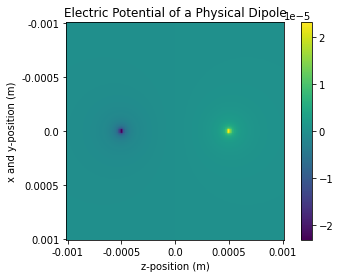

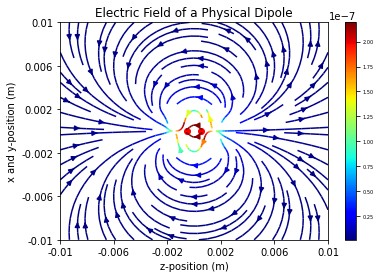

In [ ]:
# defining the electric potential for each charge
def E_potential_dipole(x,y):
  E_pot_1 = -I/(4*np.pi*sigma*np.abs(np.sqrt((x+0.0005)**2+y**2)))
  E_pot_2 = I/(4*np.pi*sigma*np.abs(np.sqrt((x-0.0005)**2+y**2)))
  return E_pot_1 + E_pot_2

# plotting the potential coming from the charges
scale = 10**(-3) # for appropriately plotting the potential
x_pots,y_pots = np.meshgrid(np.linspace(-scale,scale,100),np.linspace(-scale,scale,100))
pots = E_potential_dipole(x_pots,y_pots)
plt.imshow(pots)

#formatting the plot
plt.xticks(ticks = np.linspace(0,99,5),labels= np.linspace(-scale,scale,5))
plt.yticks(ticks = np.linspace(0,99,5),labels= np.linspace(-scale,scale,5))
plt.xlabel('z-position (m)')
plt.ylabel('x and y-position (m)')
plt.title('Electric Potential of a Physical Dipole')
plt.colorbar()
plt.show()

#defining the E_field in x and y direction
def E_field_dipole(x,y):
  E_x = -I*(x+0.0005)/(4*np.pi*sigma*(np.sqrt((x+0.0005)**2+y**2))**2) + I*(x-0.0005)/(4*np.pi*sigma*(np.sqrt((x-0.0005)**2+y**2))**2)
  E_y = -I*(y)/(4*np.pi*sigma*(np.sqrt((x+0.0005)**2+y**2))**2) + I*(y)/(4*np.pi*sigma*(np.sqrt((x-0.0005)**2+y**2))**2)
  return E_x, E_y

# plotting the E field and charges
scale = 10**(-2) # for appropriately plotting the fields
x,y = np.meshgrid(np.linspace(-scale,scale,14),np.linspace(-scale,scale,14))

f, ax = plt.subplots()
E_tot = np.sqrt(E_field_dipole(x,y)[0]**2 + E_field_dipole(x,y)[1]**2)
stream = ax.streamplot(x,y,E_field_dipole(x,y)[0],E_field_dipole(x,y)[1],color=E_tot, cmap=plt.cm.jet)
ax.scatter([-0.0005,0.0005],[0,0],c='red',label='charges')

ax.set_xlim([-scale,scale])
ax.set_ylim([-scale,scale])
ax.set_xlabel('z-position (m)')
ax.set_ylabel('x and y-position (m)')
ax.set_title('Electric Field of a Physical Dipole')
ax.set_xticks(ticks = np.linspace(-scale,scale,6),labels= np.linspace(-scale,scale,6))
ax.set_yticks(ticks = np.linspace(-scale,scale,6),labels= np.linspace(-scale,scale,6))
cbar = f.colorbar(stream.lines, ax=ax)
cbar.ax.tick_params(labelsize=5)


*(d) Plot the equipotential and E field for the mathematical dipole corresponding to the physical one in (c):
dipole of $I=+1nA$ at $z=-0.5mm$ and $I=-1nA$ at $z=0.5mm$*



*The potential is*

$$
\Phi(r)=\frac{\overrightarrow{p} * \overrightarrow{r}}{4 \pi \sigma r^3}
$$

*where p is pointing from the – to the + current and its magnitude is Id, with d the distance between the two locations of the point currents.*

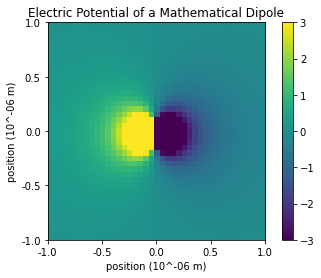

In [ ]:
# in this question we use the mathematical dipole approximation
# rather than using the physically distinct charges and superpositing them

p = 10**(-9)*np.array([0,0,-0.5*10**(-3)]) - 10**(-9)*np.array([0,0,0.5*10**(-3)])
# There is only a p in z-direction, of -1.e-12 magnitude
p = p[2]

scale = 0.5*10**(-5)
x_pots,y_pots = np.meshgrid(np.linspace(-scale,scale,200),np.linspace(-scale,scale,200))
phi = p * x_pots / (4 * np.pi * sigma * np.sqrt(x_pots**2 + y_pots**2)**3)

plt.imshow(phi,vmin=-3,vmax=3)
plt.colorbar()

#formatting the plot, zooming in since most of it is empty space;
# the dipole is only
plt.xlim([80,120])
plt.ylim([80,120])

ticks = (scale / 200) * 40
set_ticks = np.linspace(-1,1,5)
plt.xticks(ticks = np.linspace(80,120,5), labels = set_ticks)
plt.yticks(ticks = np.linspace(80,120,5), labels = set_ticks)
plt.xlabel(f'position (10^-{str(np.max(ticks))[-2:]} m)')
plt.ylabel(f'position (10^-{str(np.max(ticks))[-2:]} m)')
plt.title('Electric Potential of a Mathematical Dipole')

plt.show()

*The electrical field is given by*

$$
E = \frac{3(\overrightarrow{p}*\overrightarrow{r})\overrightarrow{r} - \overrightarrow{p}r^2}{r^5}
$$

*which for a dipole in the z-direction simplifies to*

$$
E_x
  = \frac{3p_zz^2-p_zr^2}{r^5}
$$

$$
E_y  = \frac{3p_zzy}{r^5}
$$

$$
E_z  = \frac{3p_zzx}{r^5}
$$

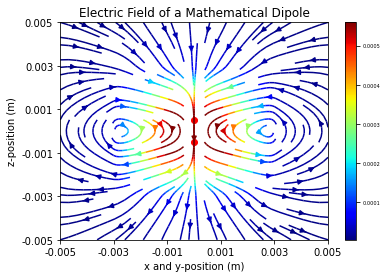

In [ ]:
# We can set E_y to zero due to radial symmetry, therefore
# we can plot the electric field inside the x,z plane
import copy

scale = 10**(-2)*0.5
N = 6
x,z = np.meshgrid(np.linspace(-scale,scale,N),np.linspace(-scale,scale,N))
r = np.sqrt(x**2 + z**2)
p_z = copy.deepcopy(p)

E_z = (3 * p_z * z**2 - p_z*r**2)/r**5
E_x = (3 * p_z * x * z)/r**5
E_tot = np.sqrt(E_z**2 + E_x**2)

f, ax = plt.subplots()
stream = ax.streamplot(x,z,E_x,E_z,color=E_tot, cmap=plt.cm.jet)
ax.scatter([0,0],[-0.0005,0.0005],c='red',label='charges')

ax.set_xlim([-scale,scale])
ax.set_ylim([-scale,scale])
ax.set_xlabel('x and y-position (m)')
ax.set_ylabel('z-position (m)')
ax.set_title('Electric Field of a Mathematical Dipole')
ax.set_xticks(ticks = np.linspace(-scale,scale,6),labels= np.linspace(-scale,scale,6))
ax.set_yticks(ticks = np.linspace(-scale,scale,6),labels= np.linspace(-scale,scale,6))
cbar = f.colorbar(stream.lines, ax=ax)
cbar.ax.tick_params(labelsize=5)

plt.show()

In the plot above the red dots represent the charges, but *these are not actually computationally explicitly present*, only implicitly.

The difference between the dipoles in question c and question d is the definition of the dipole. One is the physical dipole, which sees the charges as separate and consequently superpositioning their physical potentials and fields. The mathematical dipole defines the dipole as a single construct rather than as superposition of separate charges, and will consequently require separate treatment. However, we do see that the electric fields coincide with each other; the same cannot be said for the potential, there a clear distinction can be made between the potential of the physical dipole and the mathematical dipole.



*(e) Create a “for” loop to create N mathematical dipoles with different spin: up or down.
(e.g. changing I to 1 or -1) based on a probability p. Calculate the superposition of the
electric field. How does the magnitude of the electric field scale for different values of p (0,
0.45, 0.5, 1). Can you explain this?*

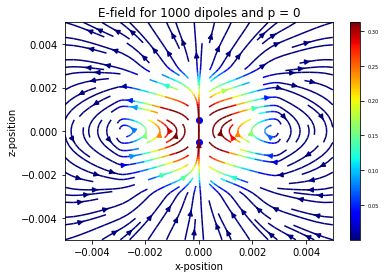

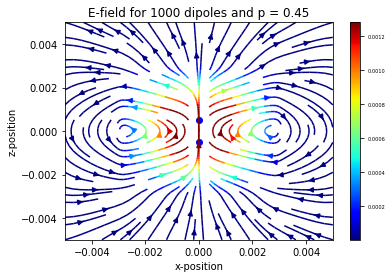

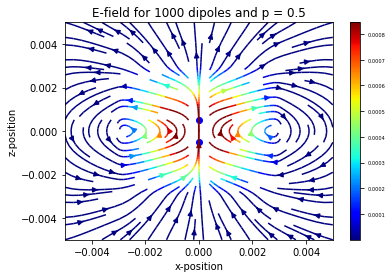

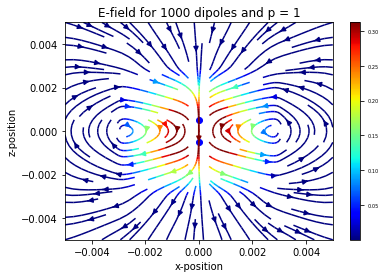

In [ ]:
# We can set E_y to zero due to radial symmetry, therefore
# we can plot the electric field inside the x,z plane
import copy

scale = 10**(-2)*0.5
N = 6
x,z = np.meshgrid(np.linspace(-scale,scale,N),np.linspace(-scale,scale,N))
r = np.sqrt(x**2 + z**2)
p_z = copy.deepcopy(p)

probs = [0,0.45,0.5,1]
n_dips = 1000

for prob in probs:
  E_z_list = []
  E_x_list = []
  for i in range(n_dips):
    if np.random.rand()>prob:
      E_z = -(3 * p_z * z**2 - p_z*r**2)/r**5
      E_x = -(3 * p_z * x * z)/r**5
    else:
      E_z = (3 * p_z * z**2 - p_z*r**2)/r**5
      E_x = (3 * p_z * x * z)/r**5
    E_z_list.append(E_z)
    E_x_list.append(E_x)

  E_z = np.sum(np.array(E_z_list),axis=0)
  E_x = np.sum(np.array(E_x_list),axis=0)
  E_tot = (E_z**2 + E_x**2)

  f, ax = plt.subplots()
  stream = ax.streamplot(x,z,E_x,E_z,color=E_tot, cmap=plt.cm.jet)
  ax.scatter([0,0],[-0.0005,0.0005],c='blue',label='charges')

  ax.set_xlim([-scale,scale])
  ax.set_ylim([-scale,scale])
  ax.set_xlabel('x-position')
  ax.set_ylabel('z-position')
  ax.set_title(f'E-field for {n_dips} dipoles and p = {prob}')
  cbar = f.colorbar(stream.lines, ax=ax)
  cbar.ax.tick_params(labelsize=5)

  plt.show()

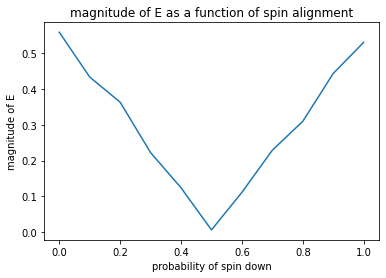

In [ ]:
# We can set E_y to zero due to radial symmetry, therefore
# we can plot the electric field inside the x,z plane
scale = 10**(-2)*0.5
N = 6
x,z = np.meshgrid(np.linspace(-scale,scale,N),np.linspace(-scale,scale,N))
r = np.sqrt(x**2 + z**2)
p_z = copy.deepcopy(p)

probs = np.linspace(0,1,11)
E_x_tot = []
E_z_tot = []

for prob in probs:
  E_z_list = []
  E_x_list = []

  for i in range(1000):
    if np.random.rand()>prob:
      E_z = -(3 * p_z * z**2 - p_z*r**2)/r**5
      E_x = -(3 * p_z * x * z)/r**5
    else:
      E_z = (3 * p_z * z**2 - p_z*r**2)/r**5
      E_x = (3 * p_z * x * z)/r**5

    E_z_list.append(E_z)
    E_x_list.append(E_x)

  E_z_val = np.sum(np.array(E_z_list),axis=0)
  E_x_val = np.sum(np.array(E_x_list),axis=0)

  E_x_tot.append(np.max(E_x_val))
  E_z_tot.append(np.max(E_z_val))

E_tots = np.sqrt(np.array(E_z_tot)**2 + np.array(E_x_tot)**2)
plt.plot(probs,E_tots)
plt.xlabel('probability of spin down')
plt.ylabel('magnitude of E')
plt.title('magnitude of E as a function of spin alignment')
plt.show()

The total electric field is a superposition of the electric fields of individual dipoles. Moreover, the individual dipoles have identical E-fields, either pointing up or down. If $p = 0$ or $p = 1$, all dipoles are aligned and add up to a stronger E-field. For $p=0.5$, there is approximately an equal amount of dipoles with spin up and spin down; consequently, the E-field will be much weaker for $p = 0.5$. This is reflected also in the last plot, where $|E|$ is plotted as a function of $p$. For $p = 0$ and $p=1$ the magnitude is higher than for $p=0.5$.